# Introduction to Data Science

<div class="alert alert-block alert-success">
<b>Assignment 1: Exploratory Data Analysis of the Titanic: Machine Learning From Disaster dataset
</div>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Reading data
df_titanic = pd.read_csv('C:\\Users\\Asus\\Documents\\train.csv')
df_titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> We have 12 variables and each variable has 891 records. Some of data are missing.

#### Question 1: Please show all the information that belongs to the first six passengers. You should have 6 rows each referring to a passenger, and the values of 12 features (columns) for each passenger.

In [2]:
#1-Showing the top six row
df_titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


#### Question 2: Please list the attributes (column titles).

In [3]:
#2-Attributes
column_names = list(df_titanic)
column_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### Question 3: Please show the size of the dataset: (the number of passengers only). 

In [4]:
#3-Size Of Dataset
print('Number of passengers:') 
len(df_titanic)

Number of passengers:


891

#### Question 4: Please check how many missing values there are in the dataset for the columns “Age”,“Cabin” and “Embarked”.

In [5]:
#4-Missing values
df_miss = df_titanic.isnull().sum()
df_miss[df_miss != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

#### Question 5: Please create a pie chart that shows the percentage of passengers that embarked from each port (Southampton, Cherbourg, Queenstown).

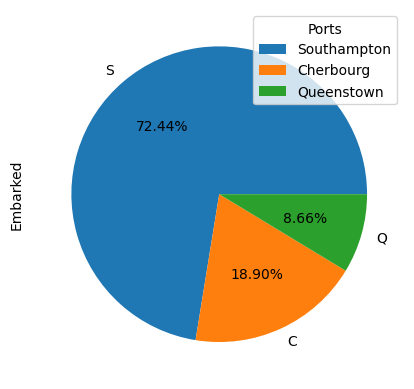

In [6]:
#5- pie chart of passengers that embarked from each port
df_titanic["Embarked"].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend(['Southampton','Cherbourg','Queenstown'],title= "Ports")
plt.show()
#so which port is the most number of people embarked from: S > C > Q

> Ranking from which port the most people boarded: Southampton > Cherbourg > Queenstown

#### Question 6: Please create a bar chart that shows the number of passengers traveling for each class.

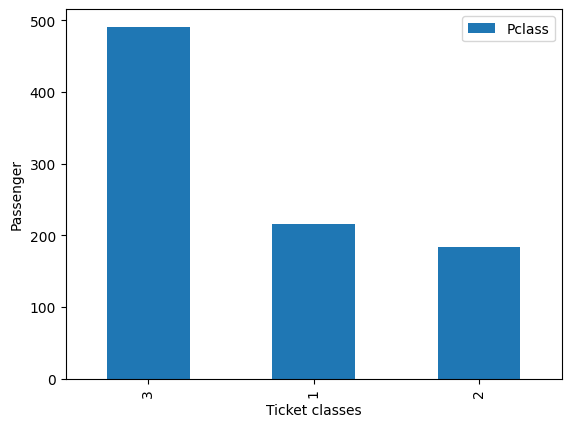

In [7]:
#6-number of passengers traveling for each class
df_titanic["Pclass"].value_counts().plot.bar()
plt.xlabel("Ticket classes")
plt.ylabel("Passenger")
plt.legend()
plt.show()

> Ranking of most purchased ticket class: `3rd > 1st > 2nd`

#### Question 7: Please create a plot that shows the number of female passengers for each ticket class who survived and who did not survive in bar chart format.

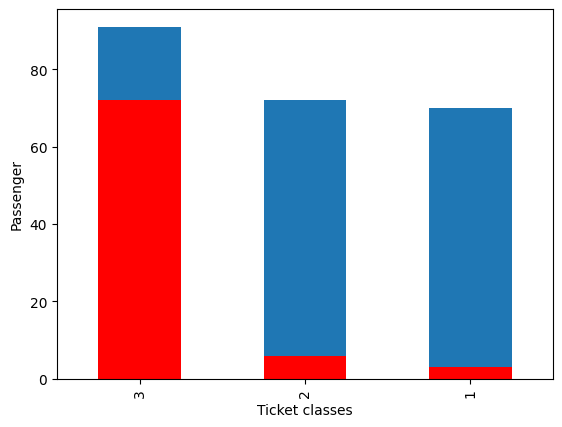

In [8]:
#7-number of female passengers for each ticket class who survived and who did not survive
df_titanic[df_titanic.Sex == 'female'][df_titanic.Survived == 1]["Pclass"].value_counts().plot.bar()
df_titanic[df_titanic.Sex == 'female'][df_titanic.Survived == 0]["Pclass"].value_counts().plot.bar(color="red")
plt.xlabel("Ticket classes")
plt.ylabel("Passenger")
plt.show()


> As seen above, There were more women didn't survive at 3rd class. Ranking is: `3rd > 2nd > 1st` classes

#### Question 8: Please create two boxplots that show the key age statistics of female and male passengers who survived and who did not survive. 

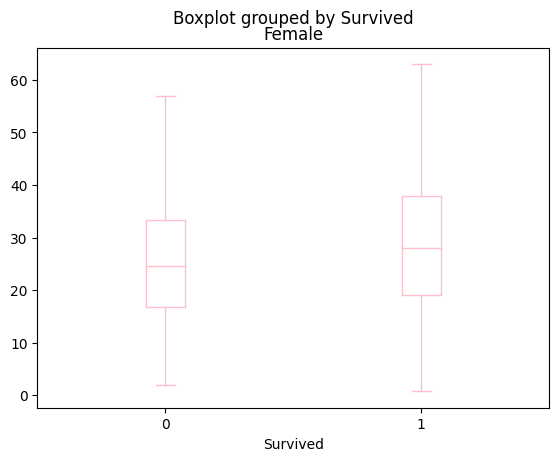

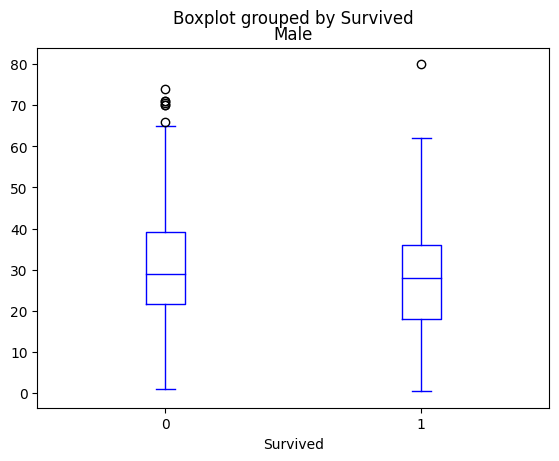

In [9]:
#8-age statistics of female and male passengers who survived and who did not survive
temp_bplt = df_titanic[df_titanic.Sex == 'female'].boxplot(by ='Survived', column =['Age'], grid = False, color = 'pink')
plt.title('Female')
temp_bplt.plot()

temp_bplt2 = df_titanic[df_titanic.Sex == 'male'].boxplot(by ='Survived', column =['Age'], grid = False, color = 'blue')
plt.title('Male')
temp_bplt2.plot()


plt.show()

#### Question 9: Please create a cross table as shown below (x will be computed)
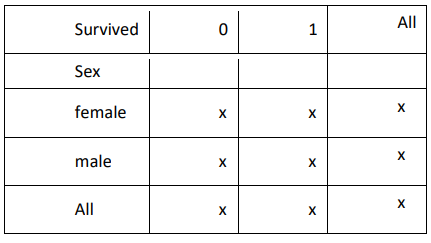

In [10]:
#cross table
df_titanic[["Sex", "Survived"]].pivot_table(index='Sex', columns='Survived', margins=True, aggfunc=len)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### Question 10: Please indicate which gender has the most number of survivors.

In [11]:
#cross table
df_titanic[["Sex", "Survived"]].pivot_table(index='Sex', columns='Survived', margins=True, aggfunc=len)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


> As seen on cross table, female has more survivaliabilty.

#### Question 11: Please create a heatmap for the correlation between the attributes of survival, age, sex, fare, and ticket class.

<AxesSubplot: >

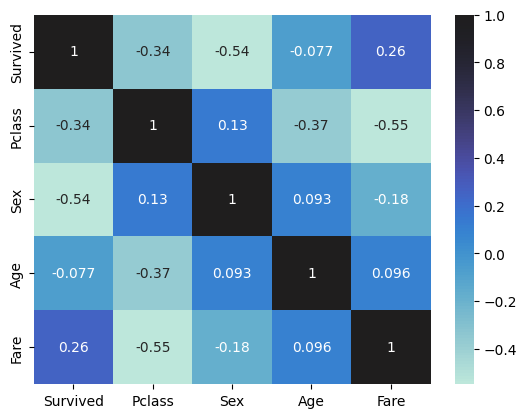

In [12]:
df_titanicc = pd.read_csv('C:\\Users\\Asus\\Documents\\train.csv')
df_titanicc["Sex"] = [1 if i == "male" else 0 for i in df_titanicc["Sex"]] 
a = df_titanicc.drop(['PassengerId','Name','Ticket','Cabin','Embarked', 'SibSp','Parch'], axis=1)
sb.heatmap(a.corr(),annot=True,center=1)

#### Question 12: Please calculate the “Pearson” standard correlation coefficient for each correlation

<AxesSubplot: >

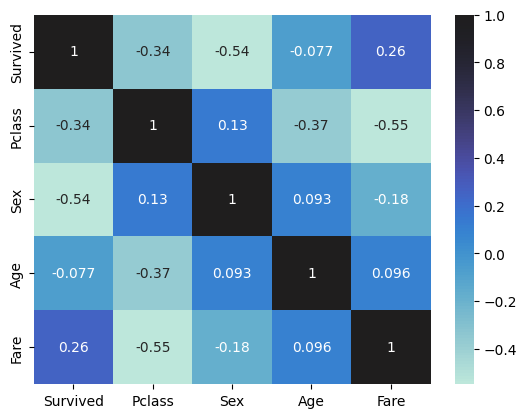

In [13]:
b = df_titanicc.drop(['PassengerId','Name','Ticket','Cabin','Embarked', 'SibSp','Parch'], axis=1)
sb.heatmap(b.corr(method='pearson'),annot=True,center=1)

#### Question 13: What is the age of the youngest passenger?

In [14]:
youngest = df_titanic['Age'].min()
youngest

0.42

#### Question 14: How much is the average fare?

In [15]:
df_titanic["Fare"].mean()

32.204207968574636

#### Question 15: What is the age of the oldest passenger who survived?

In [16]:
df_titanic[df_titanic['Survived'] == True]['Age'].max()

80.0

#### Question 16: What is the age of the oldest female passenger who survived?

In [17]:
df_titanic[df_titanic['Survived'] == True][df_titanic['Sex']=='female']['Age'].max()

63.0

#### Question 17: Are there any children under the age of 10 traveling without their parents? What might this indicate?

In [18]:

df_titanic[(df_titanic["Age"] <= 10)][(df_titanic["Parch"] < 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S


#### Question 18: Please plot the histograms that show the age distribution of the female and male passengers who survived.

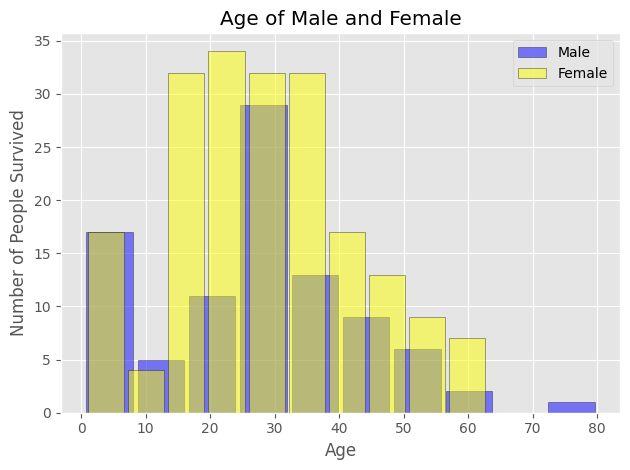

In [19]:
df_0100 = df_titanic[(df_titanic["Age"] <= 100) & (df_titanic["Age"] >= 0) & (df_titanic["Survived"] == True)]
male = df_0100['Sex']  == 'male'
female = df_0100['Sex']== 'female'
plt.style.use('ggplot')
plt.title('Age of Male and Female')
plt.hist(df_0100['Age'][male], edgecolor='black',color='blue',bins=10,label='Male',rwidth=0.9,alpha=0.5)
plt.hist(df_0100['Age'][female], edgecolor='black',color='yellow',bins=10,label='Female',rwidth=0.9, alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Number of People Survived')
plt.tight_layout()
plt.show()

> As seen above, female has more survivaliabilty.

#### Question 19: What is the number of siblings of the passenger who has the highest number of siblings?


In [20]:
df_titanic['SibSp'].max()

8

#### Question 20: Please plot a scatterplot that shows the age–fare correlation for passengers who survived and who did not survive.

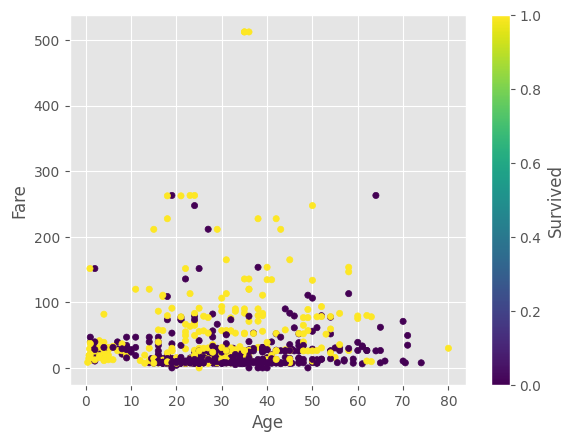

In [21]:
df_titanic.plot.scatter(x='Age', y='Fare', c='Survived',colormap='viridis', xlabel ="Age", ylabel ="Fare")
plt.show()